#### Loading the IMDB Dataset from keras

In [2]:
from keras.datasets import imdb

In [3]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
# load top frequency words upto 10000 and discard rare words

In [4]:
train_data[0]
# gives the first train data lists

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_data[1]
# gives the second train data lists

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [7]:
max(max(train_data))

9995

In [8]:
max([max(sequence) for sequence in train_data])
# since we've restricted ourself to 10000 words, now words index will exceed 10000

9999

In [9]:
# 
word_index= imdb.get_word_index()
# word_index is a dictionary mapping words to an integer index.

1646592/1641221 [==============================] - 10s 6us/step


In [10]:
reverse_word_index=dict(
[(value,key) for (key,value) in word_index.items()])
# Reverse it, mapping integer indicies  to words 

In [11]:
decoded_review= ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# decode the review. NOte that the indices are offset by 3 because 0,1 and 2 are reserved
# indices for "padding", "start of sequence" and "unknown"

### Preparing the data:
You can't feed lists of integers into a neural network. YOu have to turn your lists into tensor. there are two ways
i) padding
ii) one-hot encode

For our case , we'll do latter one. Now , vectorize the data,which we'll do manually.


In [12]:
# encoding the integer sequences into a binary matrix. ie  0 , 1 values
import numpy as np

In [13]:
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension)) # creates all zeros matrix of
    # shape (len(sequences),dimension)
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.   # sets specific indices of results[i] to 1's.
        return results

In [14]:
# vectorize the data
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [15]:
# cheking
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# vectorizing the labels also
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [17]:
# Now data is ready to fed into the neural network

### The model  defination in keras

In [18]:
from keras import models
from keras import layers

model=models.Sequential()
# we consider three layer 
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))# input side layer
# 16 is the hidden units each. (i.e neurons)
model.add(layers.Dense(16,activation='relu')) # middle layer
model.add(layers.Dense(1,activation='sigmoid')) # last output layer. has only one output neuron


### compile the model

In [19]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
# since our case in binary , so we use binary_crossentropy


In [21]:
# we can use our own values(using custom) also.
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                                           loss=losses.binary_crossentropy,
                                           metrics=[metrics.binary_accuracy])

### Validating 

In [22]:
# Create a validation set by Setting 10000 samples from the original training data:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

#### Training the Model

In [23]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512,
                 validation_data=(x_val,y_val))
# 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 358us/step - loss: 0.6932 - acc: 0.4982 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 3/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 7/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - 

In [29]:
# This history object , is a dictionary containing data about everything that happened 
# during training
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

#### Plotting the training and validation loss


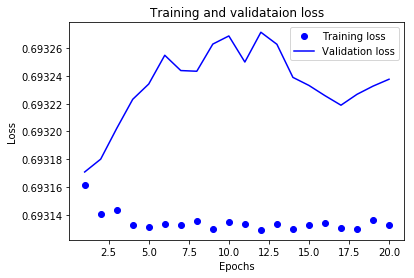

In [31]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
acc=history_dict['acc']
epochs= range(1, len(acc) +1)
plt.plot(epochs,loss_values,'bo',label='Training loss')  # bo is blue dot
plt.plot(epochs,val_loss_values,'b',label='Validation loss')  # b is solid blue line
plt.title('Training and validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

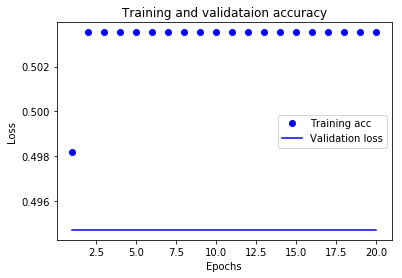

In [37]:
plt.clf  # clears the figure 
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']

plt.plot(epochs,acc_values,'bo',label='Training acc')  # bo is blue dot
plt.plot(epochs,val_acc_values,'b',label='Validation loss')  # b is solid blue line
plt.title('Training and validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
# Note that we can perform with the different values of epochs, or batch_size to see the results.